## 1. Rationale

* due to the sparseness, the ps is binned to 100 (can change) 
* then chisq test wheter the ratio of openning is dependent on bins 

##  2. load data

In [2]:
require(data.table)
dat.pro_ps<- fread("../dat/1901/alpha_beta.promoter.long_matrix_w_transcripts_ps.txt")
head(dat.pro_ps)
dim(dat.pro_ps)

gene_tr.idx,cluster,cell,ps
SAMD11_1,alpha_1,Islet1-fresh_AGACACCTAGGCAGAAGTAAGGAGCAGGA,5.643735
SAMD11_1,alpha_1,Islet1-fresh_AGACACCTATGCGCAGCGTCTAATGGTTG,1.056578
SAMD11_1,alpha_2,Islet1-fresh_AGACACCTCGAGGCTGAAGGCTATGGTTG,6.254863
SAMD11_1,alpha_2,Islet1-fresh_AGACACCTCGTACTAGCTAAGCCTGTACT,6.508574
SAMD11_1,alpha_1,Islet1-fresh_AGACACCTGGACTCCTTCGACTAGGGTTG,2.120670
SAMD11_1,alpha_2,Islet1-fresh_AGACACCTGGAGCTACAAGGAGTAAGGCG,5.564368


[1] 19412387        4

### 2.1 bin data 

In [5]:
require(tidyverse)
ps.range <- list()
ps.range$alpha <- range((dat.pro_ps %>%filter(cluster %in% c("alpha_1","alpha_2")))$ps)
ps.range$beta <- range((dat.pro_ps %>%filter(cluster %in% c("beta_1","beta_2")))$ps)
ps.range

$alpha
[1] 0.000000 6.746176

$beta
[1]  0.0000 20.2079

In [9]:
N.bin<- 101
ps.bks <- list()
ps.bks$alpha <- seq(ps.range$alpha[1],ps.range$alpha[2],length.out = N.bin)
ps.bks$beta <- seq(ps.range$beta[1],ps.range$beta[2],length.out = N.bin)

dat.pro_ps <- rbind(
    dat.pro_ps%>% 
    filter(cluster %in% c("alpha_1","alpha_2"))%>%
    mutate(ps_bin =cut(ps,breaks = ps.bks$alpha,include.lowest = T)),
    dat.pro_ps%>% 
    filter(cluster %in% c("beta_1","beta_2"))%>%
    mutate(ps_bin =cut(ps,breaks = ps.bks$beta,include.lowest = T))
)

ps.bin.dat.sum<- dat.pro_ps%>%separate(cluster,into = c("celltype","subtype"))%>%
select(-one_of("gene_tr.idx","ps"))%>%distinct()

setDT(ps.bin.dat.sum)
ps.bin.dat.sum<-ps.bin.dat.sum[, .(.N), by = .(ps_bin,celltype)]
cat(paste(N.bin,"# bins:\n"))
cat("quantiles of alpha cell number per bin:\n")
t(quantile((ps.bin.dat.sum%>%filter(celltype=="alpha"))$N))
cat("quantiles of beta cell number per bin:\n")
t(quantile((ps.bin.dat.sum%>%filter(celltype=="beta"))$N))

101 # bins:
quantiles of alpha cell number per bin:


0%,25%,50%,75%,100%
1,21,41,71.25,257


quantiles of beta cell number per bin:


0%,25%,50%,75%,100%
2,18.75,33.5,77,655


In [7]:
ps.bin.dat.sum%>%group_by(celltype)%>%summarise(tot=sum(N))

celltype,tot
alpha,5594
beta,7170


## 3. filter on glist

In [10]:
binary.glist<- readRDS('../dat/1901/binary.glist.Rds')
head(dat.pro_ps)

gene_tr.idx,cluster,cell,ps,ps_bin
SAMD11_1,alpha_1,Islet1-fresh_AGACACCTAGGCAGAAGTAAGGAGCAGGA,5.643735,"(5.6,5.67]"
SAMD11_1,alpha_1,Islet1-fresh_AGACACCTATGCGCAGCGTCTAATGGTTG,1.056578,"(1.01,1.08]"
SAMD11_1,alpha_2,Islet1-fresh_AGACACCTCGAGGCTGAAGGCTATGGTTG,6.254863,"(6.21,6.27]"
SAMD11_1,alpha_2,Islet1-fresh_AGACACCTCGTACTAGCTAAGCCTGTACT,6.508574,"(6.48,6.54]"
SAMD11_1,alpha_1,Islet1-fresh_AGACACCTGGACTCCTTCGACTAGGGTTG,2.120670,"(2.09,2.16]"
SAMD11_1,alpha_2,Islet1-fresh_AGACACCTGGAGCTACAAGGAGTAAGGCG,5.564368,"(5.53,5.6]"


In [24]:
all.tr <- unique(c(binary.glist$alpha1_tr,binary.glist$alpha2_tr,binary.glist$beta1_tr,binary.glist$beta2_tr))
length(all.tr)

[1] 3261

In [69]:
194+2160+186+721

[1] 3261

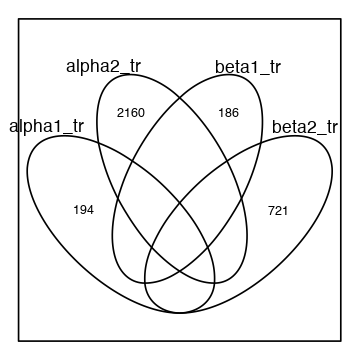

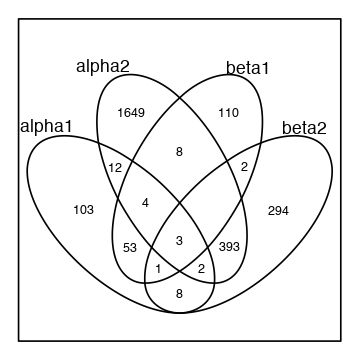

In [23]:
options(repr.plot.width=3, repr.plot.height=3)
require(venn)
binary.glist.2 <- binary.glist
binary.glist$alpha1<-NULL;binary.glist$alpha2<-NULL;binary.glist$beta1<-NULL;binary.glist$beta2<-NULL;
binary.glist.2$alpha1_tr<-NULL;binary.glist.2$alpha2_tr<-NULL;binary.glist.2$beta1_tr<-NULL;binary.glist.2$beta2_tr<-NULL;
venn(binary.glist,ellipse = T)
venn(binary.glist.2,ellipse = T)


In [25]:
dim(dat.pro_ps)
dat.pro_ps <- dat.pro_ps%>% filter(gene_tr.idx%in% all.tr)
dim(dat.pro_ps)

[1] 19412387        5

[1] 1841488       5

## 4. plot heatmap 

### 4.1 convert to percetage openning per bin

In [29]:
dat.pro_ps<- dat.pro_ps%>%separate(cluster,into=c("celltype","subtype"))


ERROR: Error in eval_tidy(enquo(var), var_env): object 'cluster' not found


In [48]:
dat.pro_ps <- dat.pro_ps %>% left_join(ps.bin.dat.sum)
dim(dat.pro_ps)
head(dat.pro_ps%>%arrange(gene_tr.idx,ps_bin))

Joining, by = c("celltype", "ps_bin", "N")


[1] 1841488       7

gene_tr.idx,celltype,subtype,cell,ps,ps_bin,N
AAGAB_7073,alpha,1,Islet2-fresh_AGACGGAGTAGGCATGTAAGGAGTGAC,0.2874200,"(0.27,0.337]",34
AAGAB_7073,alpha,1,Islet2-fresh_CAGTTGCACCTAAGACGTCTAATCTGA,0.2918434,"(0.27,0.337]",34
AAGAB_7073,alpha,1,Islet2-fresh_CAGTTGCATAGGCATGTCTGAGTTGAC,0.3206313,"(0.27,0.337]",34
AAGAB_7073,alpha,1,Islet3-fresh_CGCTCATTGCTCATGATATCCTCTGGCTCTGA,0.3131417,"(0.27,0.337]",34
AAGAB_7073,alpha,1,Islet3-fresh_TAATGCGCGCTCATGAAAGGCTATGGCTCTGA,0.2783736,"(0.27,0.337]",34
AAGAB_7073,alpha,1,Islet3-fresh_TCCGCGAACTCTCTACCCTAGAGTGGCTCTGA,0.3178772,"(0.27,0.337]",34


In [66]:
tmp <- dat.pro_ps%>% 
    group_by(gene_tr.idx,celltype,ps_bin)%>%summarise(n= n())%>%
    left_join(ps.bin.dat.sum)%>%arrange(gene_tr.idx,ps_bin)%>%
    mutate(ps_bin.2 = as.numeric(ps_bin))%>% 
    mutate(percent_open=n/N*100)
head(tmp)
dim(tmp)
head(tmp%>%filter(celltype=="beta"))

Joining, by = c("celltype", "ps_bin")


gene_tr.idx,celltype,ps_bin,n,N,ps_bin.2,percent_open
AAGAB_7073,alpha,"(0.27,0.337]",6,34,5,17.647059
AAGAB_7073,alpha,"(0.337,0.405]",4,66,6,6.060606
AAGAB_7073,alpha,"(0.405,0.472]",20,172,7,11.627907
AAGAB_7073,alpha,"(0.472,0.54]",30,257,8,11.673152
AAGAB_7073,alpha,"(0.54,0.607]",29,212,9,13.679245
AAGAB_7073,alpha,"(0.607,0.675]",12,73,10,16.438356


[1] 253066      7

gene_tr.idx,celltype,ps_bin,n,N,ps_bin.2,percent_open
ABCB1_19403,beta,"(0.202,0.404]",1,6,102,16.6666667
ABCB1_19403,beta,"(0.404,0.606]",1,15,103,6.6666667
ABCB1_19403,beta,"(0.606,0.808]",1,35,104,2.8571429
ABCB1_19403,beta,"(1.01,1.21]",1,191,106,0.5235602
ABCB1_19403,beta,"(1.21,1.41]",3,326,107,0.9202454
ABCB1_19403,beta,"(2.42,2.63]",1,44,113,2.2727273


In [67]:
tmp.a <- rbind(tmp%>%
    filter(celltype=="alpha")%>%
    group_by(gene_tr.idx,celltype) %>%
    select(-one_of(c("ps_bin","n","N")))%>%
    spread(key = ps_bin.2,value = percent_open,fill = 0),
               tmp%>%
    filter(celltype=="beta")%>%
    group_by(gene_tr.idx,celltype) %>%
    select(-one_of(c("ps_bin","n","N")))%>%
    mutate(ps_bin.2=ps_bin.2-100)%>%
    spread(key = ps_bin.2,value = percent_open,fill = 0))
head(tmp.a)
dim(tmp.a)

gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
AAGAB_7073,alpha,0,0,0,0.00000,17.647059,6.060606,11.627907,11.6731518,⋯,20.606061,19.333333,18.691589,20.00,27.586207,38.709677,31.578947,40,33.33333,0
AAMDC_3891,alpha,0,0,0,28.57143,23.529412,12.121212,16.279070,21.7898833,⋯,26.666667,33.333333,28.037383,41.25,31.034483,32.258065,36.842105,60,50.00000,50
AATF_8879,alpha,0,100,0,0.00000,8.823529,4.545455,6.976744,5.8365759,⋯,7.272727,10.000000,15.887850,11.25,17.241379,9.677419,26.315789,40,16.66667,50
ABCA2_21554,alpha,0,0,0,0.00000,0.000000,0.000000,3.488372,4.6692607,⋯,4.848485,8.666667,8.411215,12.50,5.172414,3.225806,5.263158,20,0.00000,0
ABCB10_1996,alpha,0,0,0,14.28571,5.882353,13.636364,16.279070,17.1206226,⋯,21.212121,20.666667,31.775701,27.50,22.413793,29.032258,47.368421,30,33.33333,50
ABCB9_5434,alpha,0,0,0,0.00000,0.000000,0.000000,1.162791,0.3891051,⋯,3.636364,6.000000,13.084112,3.75,12.068966,12.903226,15.789474,10,0.00000,0


[1] 3282  102

In [68]:
tail(tmp.a)

gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
ZP1_3476,beta,0,0,0.000000,2.857143,4.651163,7.329843,5.521472,4.873646,⋯,2.092050,0.5,2.3255814,1.204819,1.724138,0.000,0.000000,0,0,0
ZPBP_19225,beta,0,0,0.000000,0.000000,3.488372,2.094241,3.067485,3.068592,⋯,1.673640,0.5,0.7751938,0.000000,0.000000,0.000,0.000000,0,0,0
ZSCAN21_19522,beta,50,0,0.000000,2.857143,5.813953,3.664921,3.374233,2.527076,⋯,5.020921,7.0,6.9767442,4.819277,8.620690,9.375,18.181818,10,20,0
ZSCAN31_17964,beta,50,0,6.666667,8.571429,10.465116,11.518325,8.282209,6.498195,⋯,14.225941,14.0,16.2790698,10.843373,20.689655,18.750,27.272727,10,40,20
ZSWIM2_12697,beta,0,50,46.666667,45.714286,23.255814,24.607330,23.619632,15.703971,⋯,7.949791,10.0,3.8759690,6.024096,8.620690,3.125,9.090909,0,20,0
ZSWIM5_707,beta,0,0,0.000000,11.428571,6.976744,9.947644,5.828221,7.761733,⋯,11.715481,17.5,20.1550388,25.301205,13.793103,18.750,4.545455,10,20,20


### 4.2 data smooth

In [ ]:
dat.prom.DEGs <- semi_join(dat.prom.filtered,prom.DEG.res,by=c("gene","celltype"))
ct <- "alpha"
system.time(dat.prom.DEGs.ct <- mclapply(unique(subset(dat.prom.DEGs,celltype==ct)$gene),
                           function(g){data.frame(bin=1:100,
                                                  gene=g,
                                                  percent=predict(loess(percent~bin, data=dat.prom.DEGs%>%filter(gene==g & celltype==ct))),
                                                  celltype=ct)},mc.cores=10))